In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Import dataframe

In [10]:
nba_stats = pd.read_csv('../data/nba_later_eda.csv', index_col = [0])

# Label Stats

In [11]:
offensive_stats = ['FG%', '3P%', 'OREB', 'TOV', 'DD2',
            'TD3', 'T_FGM%', 'T_FGA%', 'T_3PM%', 'T_3PA%', 'T_OREB%',
            'T_TOV%', '2ND_CH_PTS', 'FB_PTS', 'FP', 'STL', 'USG%', 
                'FGM_UAST%',
                  'AST'] 

# KMEANS

In [14]:
X = nba_stats[offensive_stats]
y = nba_stats['Player']

#scale data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#dimensionality reduction
pca = PCA(n_components = 5)
pca.fit(X_sc)
X_pca = pca.transform(X_sc)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

#creating clusters
offensive = KMeans(n_clusters = 3, random_state= 248)
offensive.fit(X_pca)
y_kmeans = defensive.predict(X_pca)
nba_stats['off_kmean'] = offensive.labels_
off_sil = silhouette_score(X_sc, offensive.labels_)
print("Silhouette Score:", silhouette_score(X_sc, offensive.labels_))

Cumulative Explained Variance: 0.817673259721987
Silhouette Score: 0.28182522603841853


In [15]:
off_cluster0 = nba_stats[nba_stats['off_kmean'] == 0]
off_cluster1 = nba_stats[nba_stats['off_kmean'] == 1]
off_cluster2 = nba_stats[nba_stats['off_kmean'] == 2]

# Boxplots

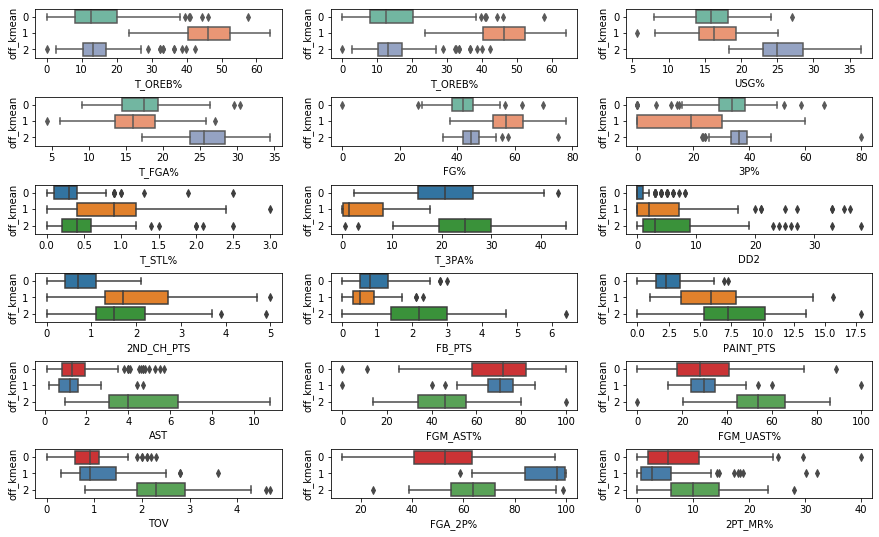

In [16]:
fig, axes = plt.subplots(6, 3, figsize = (15, 9))
plt.subplots_adjust(hspace = 0.8)
sns.boxplot(x = 'T_OREB%', y = 'off_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[0,0])
sns.boxplot(x = 'T_OREB%', y = 'off_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[0,1])
sns.boxplot(x = 'USG%', y = 'off_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[0,2])
#---------------------- line 2
sns.boxplot(x = 'T_FGA%', y = 'off_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[1,0])
sns.boxplot(x = 'FG%', y = 'off_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[1,1])
sns.boxplot(x = '3P%', y = 'off_kmean', data = nba_stats, orient="h", palette="Set2", ax = axes[1,2])
#---------------------- LINE 3
sns.boxplot(x = 'T_STL%', y = 'off_kmean', data = nba_stats, orient="h", ax = axes[2,0])
sns.boxplot(x = 'T_3PA%', y = 'off_kmean', data = nba_stats, orient="h", ax = axes[2,1])
sns.boxplot(x = 'DD2', y = 'off_kmean', data = nba_stats, orient="h", ax = axes[2,2])
#---------------------- LINE 4
sns.boxplot(x = '2ND_CH_PTS', y = 'off_kmean', data = nba_stats, orient="h", ax = axes[3,0])
sns.boxplot(x = 'FB_PTS', y = 'off_kmean', data = nba_stats, orient="h", ax = axes[3,1])
sns.boxplot(x = 'PAINT_PTS', y = 'off_kmean', data = nba_stats, orient="h", ax = axes[3,2])
#---------------------- LINE 5
sns.boxplot(x = 'AST', y = 'off_kmean', data = nba_stats, orient="h", palette="Set1", ax = axes[4,0])
sns.boxplot(x = 'FGM_AST%', y = 'off_kmean', data = nba_stats, orient="h", palette="Set1", ax = axes[4,1])
sns.boxplot(x = 'FGM_UAST%', y = 'off_kmean', data = nba_stats, orient="h", palette="Set1", ax = axes[4,2])
#---------------------- LINE 6
sns.boxplot(x = 'TOV', y = 'off_kmean', data = nba_stats, orient="h", palette="Set1", ax = axes[5,0])
sns.boxplot(x = 'FGA_2P%', y = 'off_kmean', data = nba_stats, orient="h", palette="Set1", ax = axes[5,1])
sns.boxplot(x = '2PT_MR%', y = 'off_kmean', data = nba_stats, orient="h", palette="Set1", ax = axes[5,2])

In [17]:
print(f'There are {len(off_cluster0)} players in Cluster 0')
print(f'There are {len(off_cluster1)} players in Cluster 1')
print(f'There are {len(off_cluster2)} players in Cluster 2')

There are 259 players in Cluster 0
There are 75 players in Cluster 1
There are 93 players in Cluster 2
